## **✪ Simple Linear Regression ✪**

#### **➡️Defination Linear Regression**

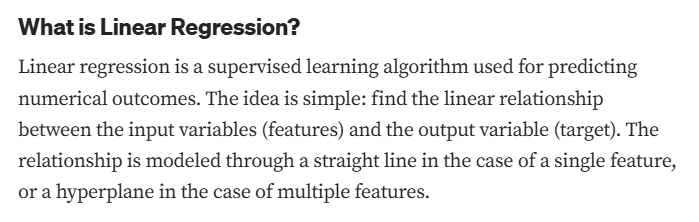

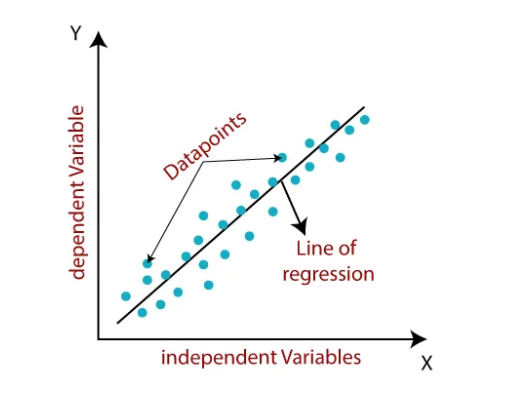

#### **➡️Types of Linear Regression**

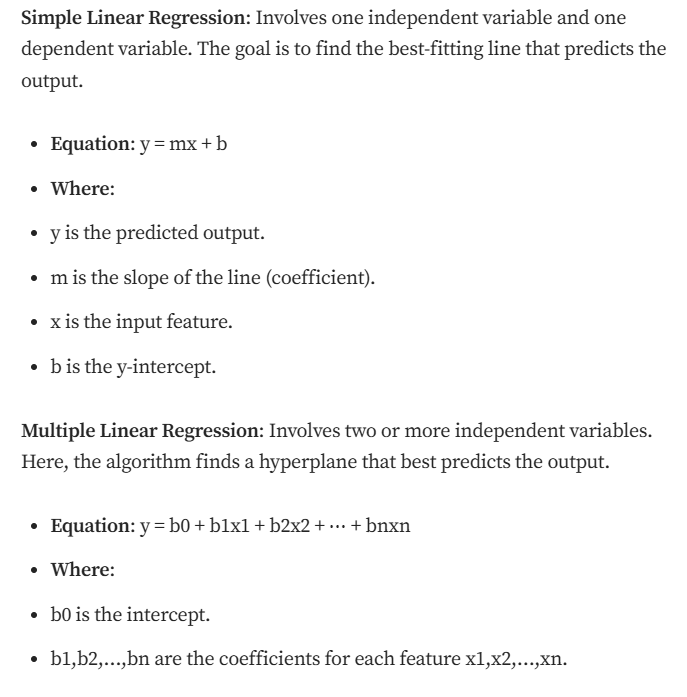

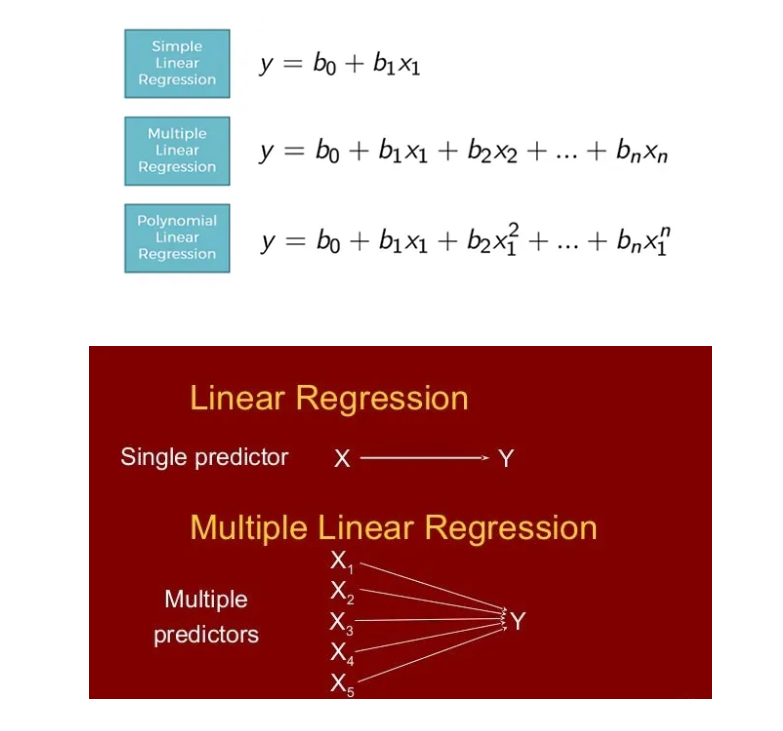

#### **➡️Work Principle of Linear Regression**

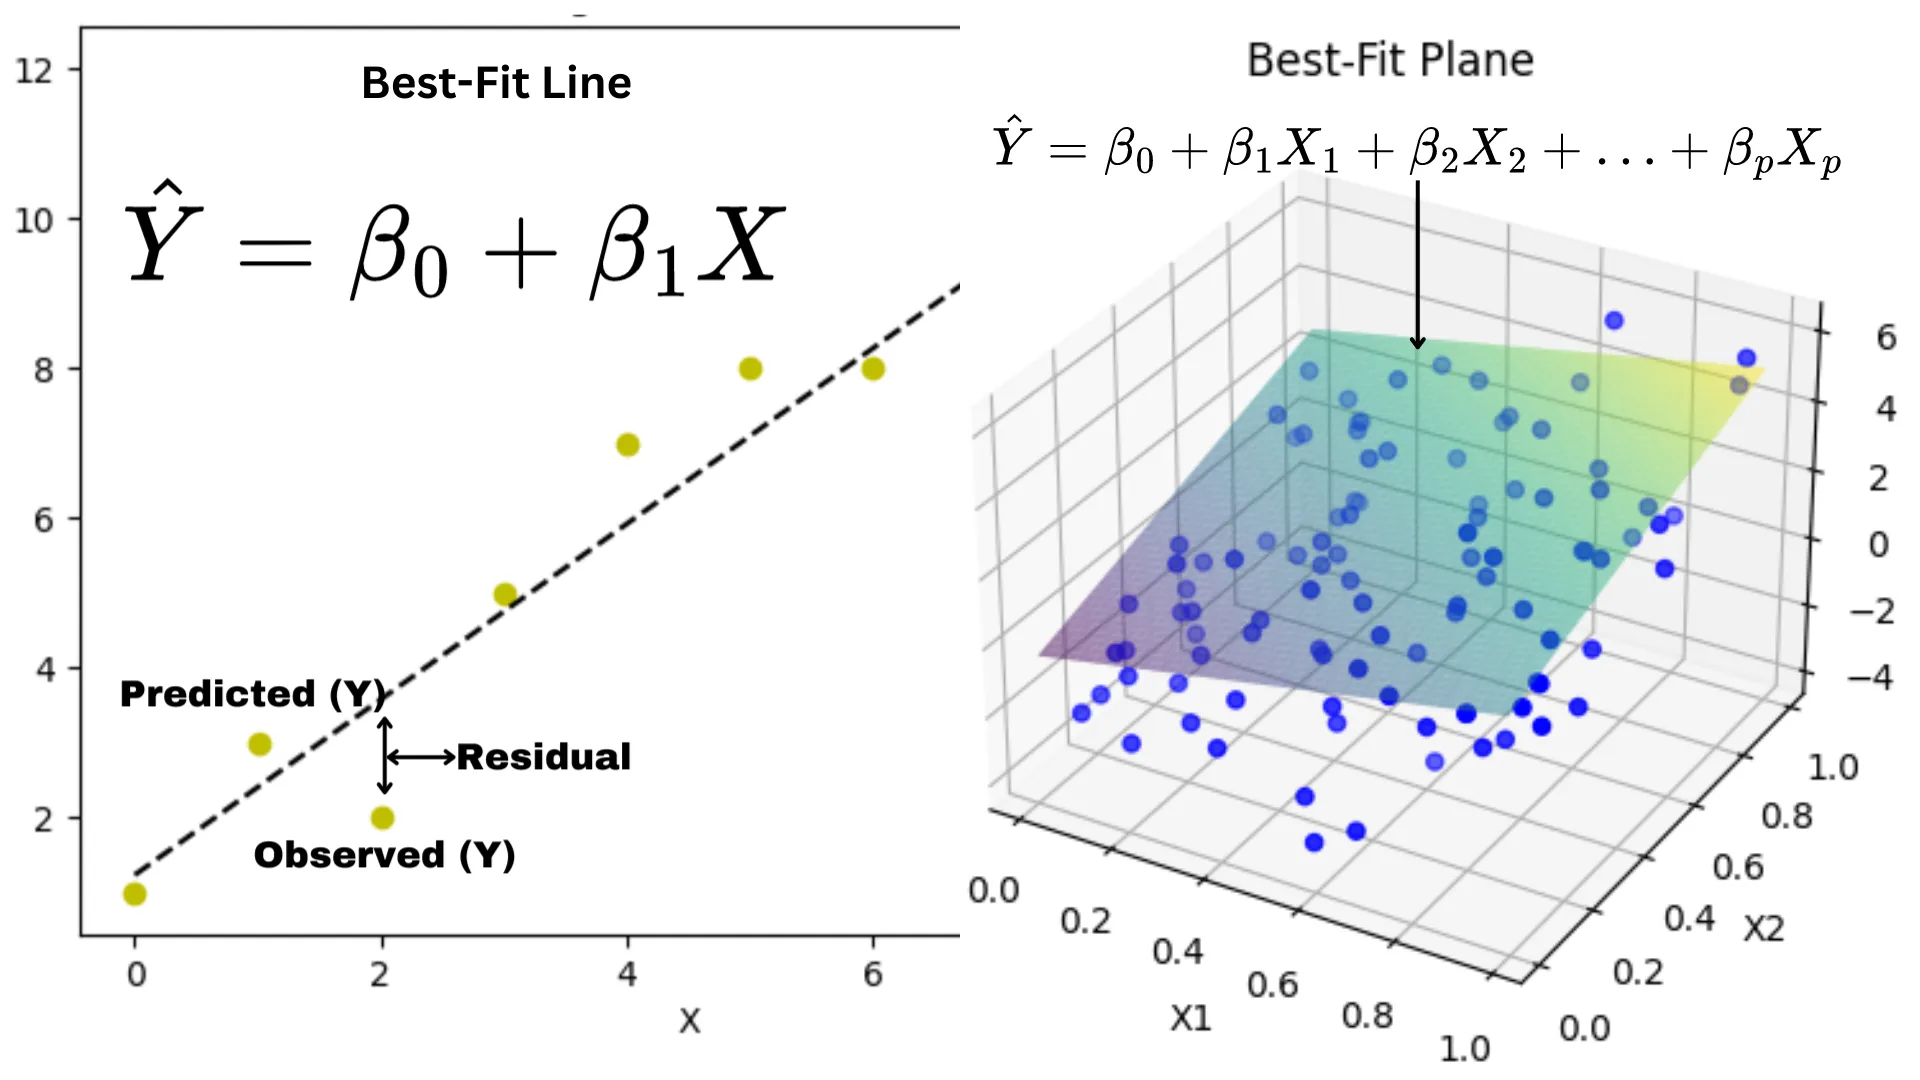

#### **➡️Assumption of Linear Regression**

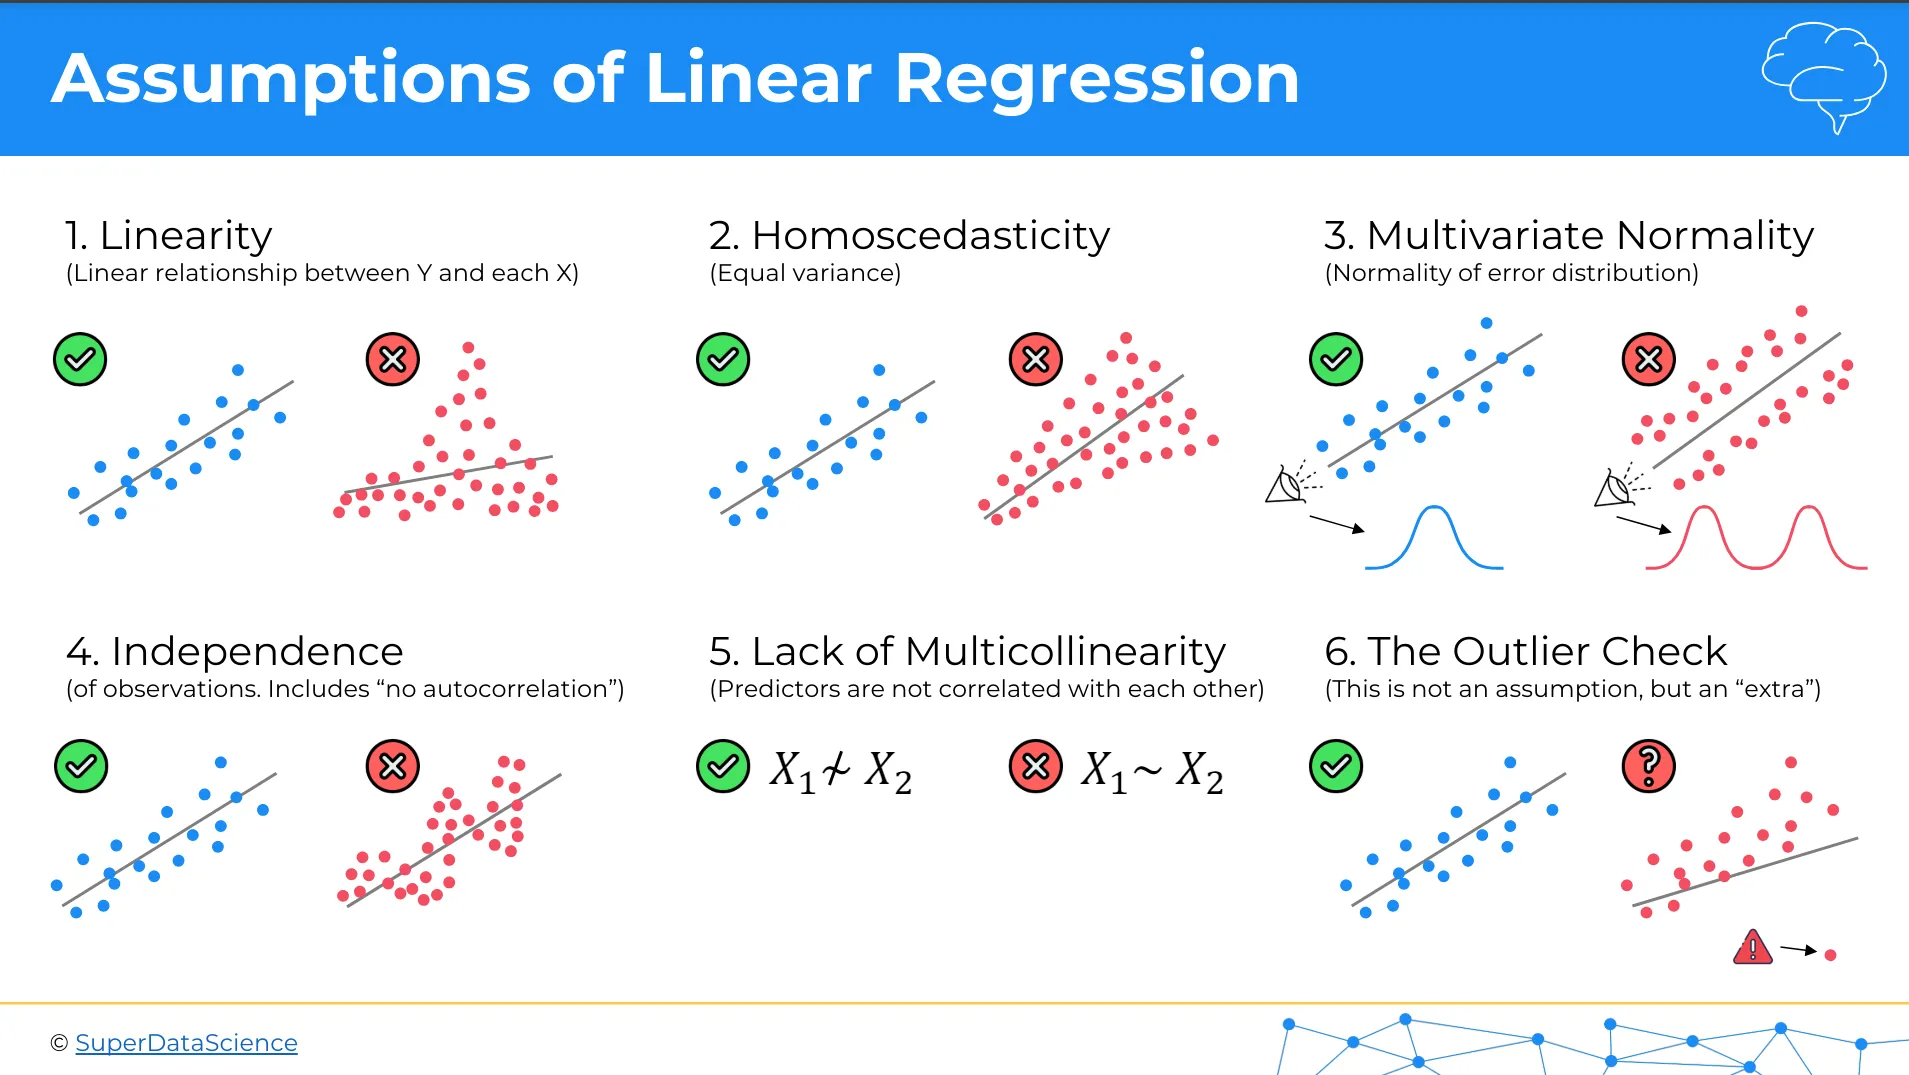

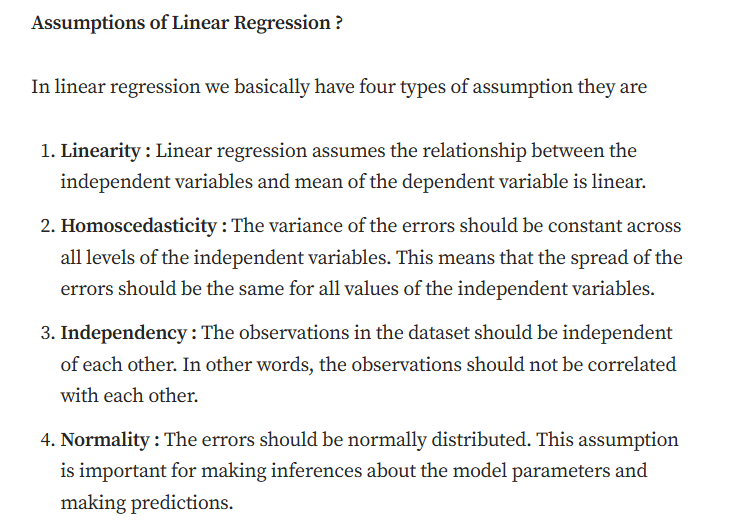

##### **➡️ Import Libraries**

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score 


##### **➡️ Load Dataset**

In [2]:
df = pd.read_csv('100_LinReg_Car_Price_Prediction.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [3]:
df.shape

(10668, 9)

##### **➡️ Dataset Preprocessing**

In [4]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [6]:
df['model'].value_counts()

model
A3     1929
Q3     1417
A4     1381
A1     1347
A5      882
Q5      877
Q2      822
A6      748
Q7      397
TT      336
A7      122
A8      118
Q8       69
RS6      39
RS3      33
RS4      31
RS5      29
R8       28
S3       18
SQ5      16
S4       12
SQ7       8
S8        4
S5        3
A2        1
RS7       1
Name: count, dtype: int64

In [7]:
df['fuelType'].value_counts()

fuelType
Diesel    5577
Petrol    5063
Hybrid      28
Name: count, dtype: int64

In [8]:
df['transmission'].value_counts()

transmission
Manual       4369
Semi-Auto    3591
Automatic    2708
Name: count, dtype: int64

In [9]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [10]:
le = LabelEncoder()
df['transmission'] = le.fit_transform(df['transmission'])

oh = OneHotEncoder(drop='first', sparse_output=False)
df['fuelType'] = oh.fit_transform(df[['fuelType']])

In [11]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,1,15735,0.0,150,55.4,1.4
1,A6,2016,16500,0,36203,0.0,20,64.2,2.0
2,A1,2016,11000,1,29946,0.0,30,55.4,1.4
3,A4,2017,16800,0,25952,0.0,145,67.3,2.0
4,A3,2019,17300,1,1998,0.0,145,49.6,1.0


In [12]:
df['fuelType'].value_counts()

fuelType
0.0    10640
1.0       28
Name: count, dtype: int64

In [13]:
df['transmission'].value_counts()

transmission
1    4369
2    3591
0    2708
Name: count, dtype: int64

In [14]:
df.drop(columns=['model', 'year'], axis=1, inplace=True)

In [15]:
df.head()

,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,12500,1,15735,0.0,150,55.4,1.4
1,16500,0,36203,0.0,20,64.2,2.0
2,11000,1,29946,0.0,30,55.4,1.4
3,16800,0,25952,0.0,145,67.3,2.0
4,17300,1,1998,0.0,145,49.6,1.0


In [16]:
X = df.drop(columns=['price'], axis=1)
y = df['price']

In [17]:
X.shape, y.shape

((10668, 6), (10668,))

In [20]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

In [21]:
X_scaled.shape, y_scaled.shape

((10668, 6), (10668, 1))

##### **➡️ Train-Test Split**

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [23]:
x_train.shape, x_test.shape

((8534, 6), (2134, 6))

In [24]:
y_train.shape, y_test.shape

((8534, 1), (2134, 1))

##### **➡️ Model Creation & Train Model**

In [25]:
model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


##### **➡️ Make Predictions**

In [28]:
y_pred = model.predict(x_test)

##### **➡️ Evaluate the Model**

In [33]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.25639380745623563


In [37]:
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

R^2 Score: 0.767195998939677


##### **➡️ Coefficient Calculation**

In [ ]:
model.coef_.flatten()

array([-0.00148898, -0.43353533,  0.2104659 , -0.19959493, -0.43504045,
        0.53547532])

##### **➡️ Train-test Value prediction**

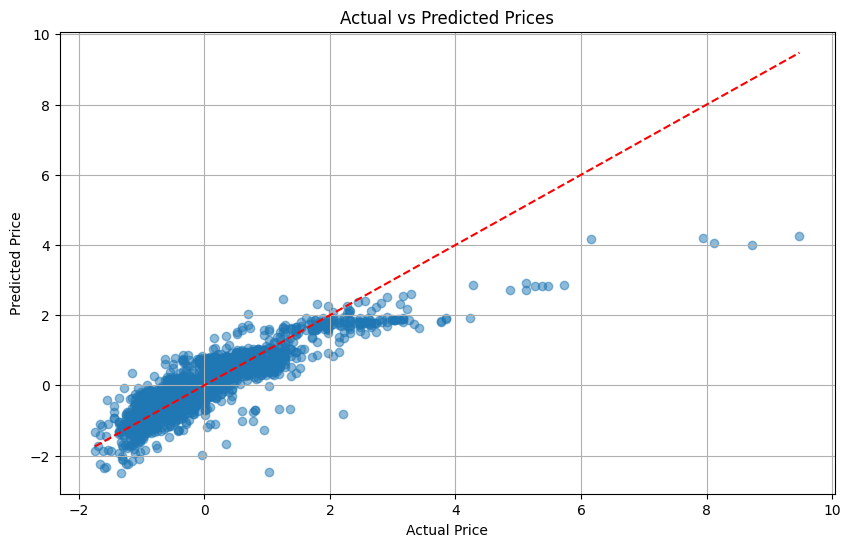

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()


##### **➡️ Residual Analysis**

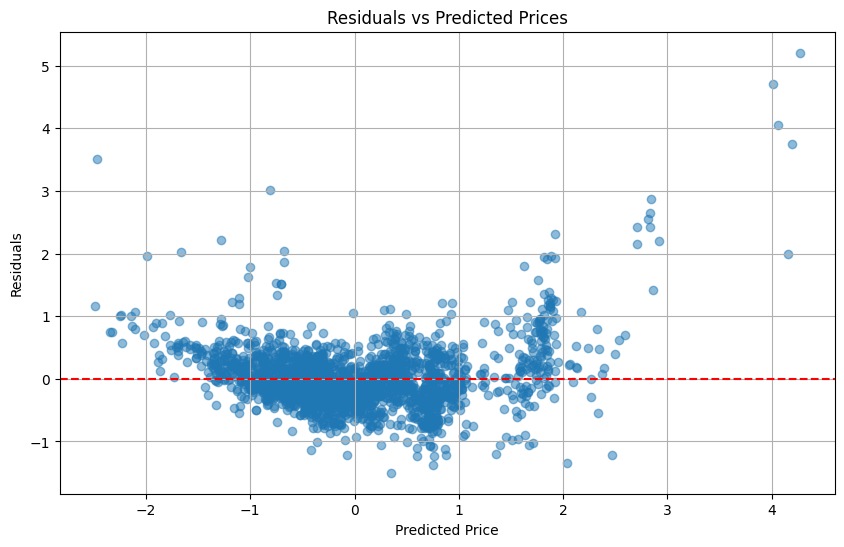

In [41]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Prices")
plt.grid(True)
plt.show()